# An Exploration of Dimensionality Reduction to Understand Collaboration in Authentic Settings with Multimodal Data


This notebook explore the use of dimension reduction methods in mapping the collected multimodal data (from collocated collaboration settings) into lower number of attribtues. This study has considered PCA, Isomap, t-SNE, FA, MFA, MCA methods. We also checked manually the resultant dimensions with original attributes which has suggested the use of first dimension as Engagement and second dimension as digital v/s physical behavior.

### Proposed Approach based on Dimensionality Reduction

In [2]:
import pandas as pd
import numpy as np
import prince

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE

from sklearn.preprocessing import StandardScaler

In [4]:


# open dataset file
# Case-1
data_18oct = pd.read_csv('ProcessedData_ProjectDay_20171018.csv')

# Case-2
data_6dec = pd.read_csv('ProcessedData_ProjectDay_20171206.csv')





# Data sample
data_18oct.head(1)

,Unnamed: 0,timestamp,group,disengaged,looking,talking,intTech,intRes,intExt,Accessed,Create,Open,Update
0,1,2017-10-18 10:15:16,1AB,0.0,0.0,1.0,1.0,0.0,0.0,2,0,0,0


In [5]:
# Remove the first three columns from the data (Unnamed, timestamp, group)
data_18oct_copy = data_18oct.drop(data_18oct.columns[[0,1,2]],axis=1)

data_6dec_copy = data_6dec.drop(data_6dec.columns[[0,1]],axis=1)
# Data sample



data_18oct_copy.head(1)

,disengaged,looking,talking,intTech,intRes,intExt,Accessed,Create,Open,Update
0,0.0,0.0,1.0,1.0,0.0,0.0,2,0,0,0


In [6]:
# Standardize the data for PCA
scaler = StandardScaler()
data_18oct_std = pd.DataFrame(scaler.fit_transform(data_18oct_copy))

data_6dec_std = pd.DataFrame(scaler.fit_transform(data_6dec_copy))

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [7]:
# Applying PCA 
pca = PCA(n_components=2)

pca_result_18oct = pca.fit_transform(data_18oct_std)

pca_result_6dec = pca.fit_transform(data_6dec_std)

# Applying Isomap
iso = Isomap(n_components=2)
iso_result_18oct = iso.fit_transform(data_18oct_std)

iso_result_6dec = iso.fit_transform(data_6dec_std)

# Applying t-SNE
tsne = TSNE(n_components=2)
tsne_result_18oct = tsne.fit_transform(data_18oct_std)

tsne_result_6dec = tsne.fit_transform(data_6dec_std)



#####  MFA method
We have used prince(https://github.com/MaxHalford/prince) library for MFA method. We have computed the resultant dimensions in separate script (As anaconda has no support for prince library). 

In [9]:
# Seperate script used to apply MFA method and results were saved in mfa_result.csv file
mfa_result_18oct = pd.read_csv('mfa_result_18oct.csv')
mfa_result_18oct.drop(mfa_result_18oct.columns[0],axis=1,inplace=True)



mfa_result_6dec = pd.read_csv('mfa_result_6dec.csv')
mfa_result_6dec.drop(mfa_result_6dec.columns[0],axis=1,inplace=True)


#### Correlation 

We have checked the correlation of resultant attributes and original attributes

In [10]:
data_18oct_copy['pca-1'] = pca_result_18oct[:,0]
data_18oct_copy['pca-2'] = pca_result_18oct[:,1]

data_18oct_copy['iso-1'] = iso_result_18oct[:,0]
data_18oct_copy['iso-2'] = iso_result_18oct[:,1]

data_18oct_copy['tsne-1'] = tsne_result_18oct[:,0]
data_18oct_copy['tsne-2'] = tsne_result_18oct[:,1]

data_18oct_copy['mfa-1'] = mfa_result_18oct.iloc[:,0]
data_18oct_copy['mfa-2'] = mfa_result_18oct.iloc[:,1]

<IPython.core.display.Javascript object>


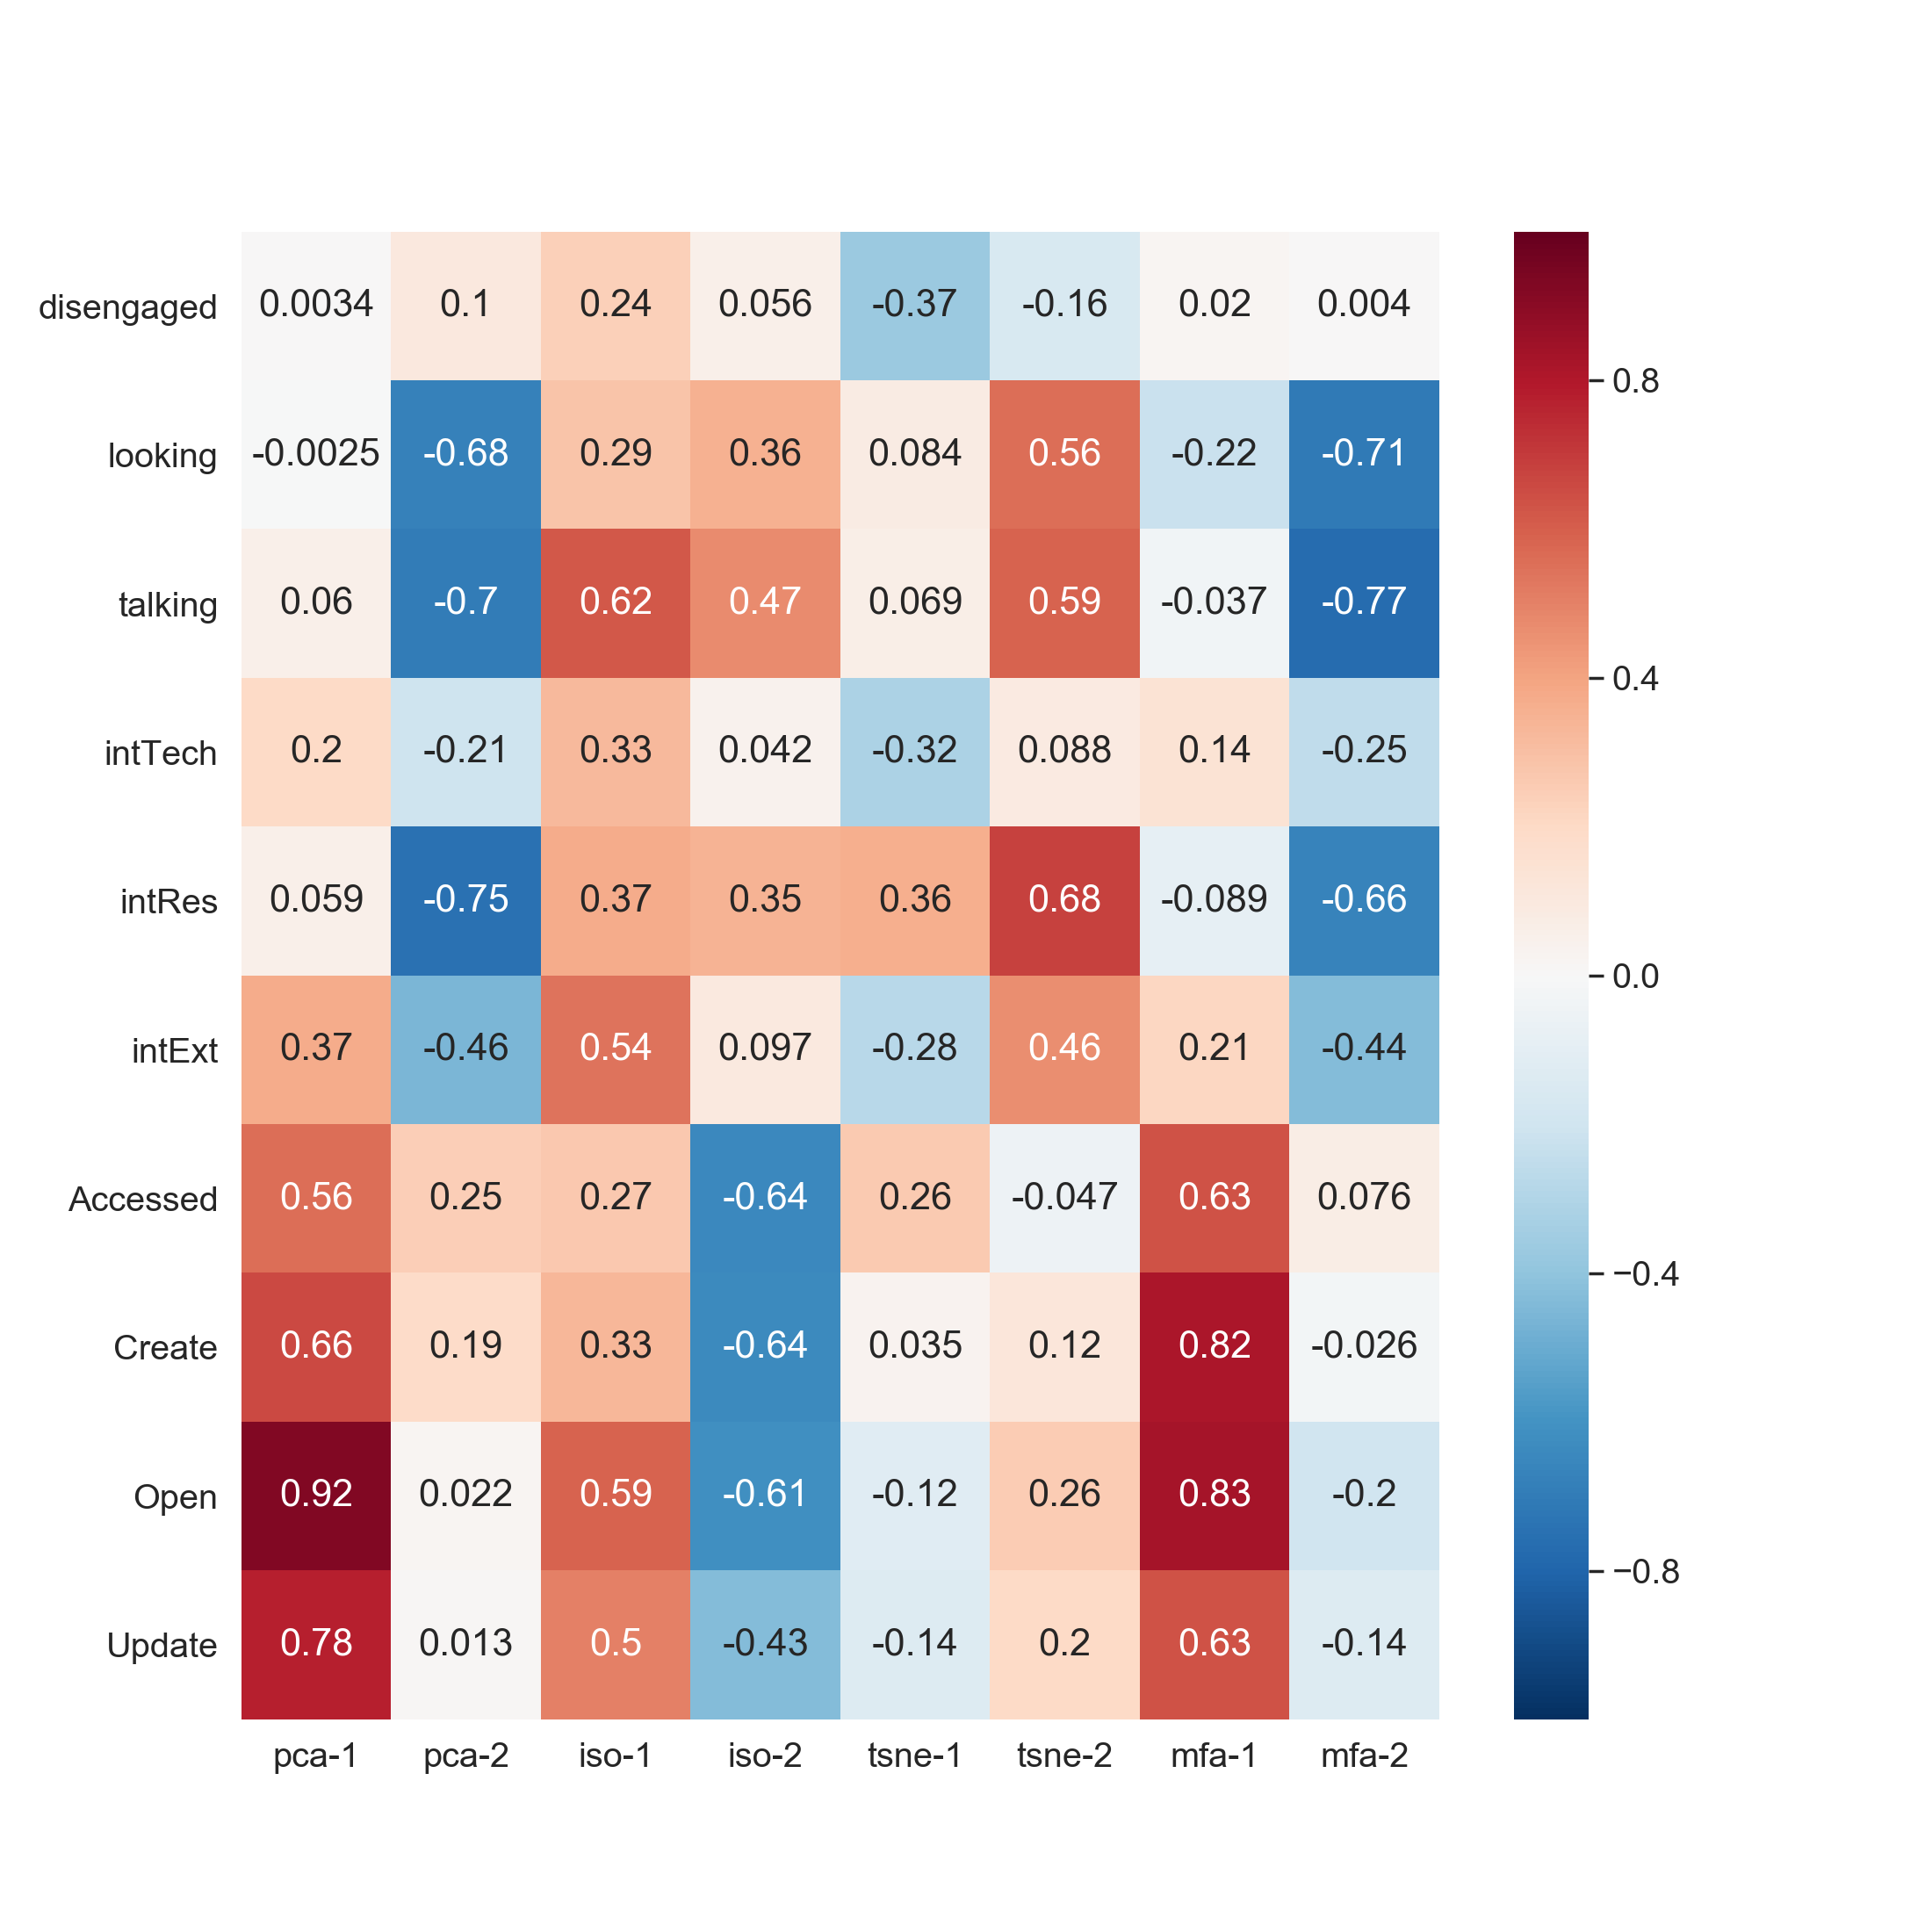

In [11]:
%matplotlib notebook

corr_matrix = data_18oct_copy.corr().iloc[0:10,-8:]
#sns.palplot(sns.color_palette("RdBu_r",7))
plt.figure(figsize=(11,11))
sns.set(font_scale=1.3)
sns.heatmap(corr_matrix,annot=True,cmap="RdBu_r",vmin=-1,vmax=1)
#plt.tight_layout()
plt.show()
plt.savefig('Corr_18oct_final.png')

In [12]:
data_6dec_copy['pca-1'] = pca_result_6dec[:,0]
data_6dec_copy['pca-2'] = pca_result_6dec[:,1]

data_6dec_copy['iso-1'] = iso_result_6dec[:,0]
data_6dec_copy['iso-2'] = iso_result_6dec[:,1]

data_6dec_copy['tsne-1'] = tsne_result_6dec[:,0]
data_6dec_copy['tsne-2'] = tsne_result_6dec[:,1]

data_6dec_copy['mfa-1'] = mfa_result_6dec.iloc[:,0]
data_6dec_copy['mfa-2'] = mfa_result_6dec.iloc[:,1]

<IPython.core.display.Javascript object>


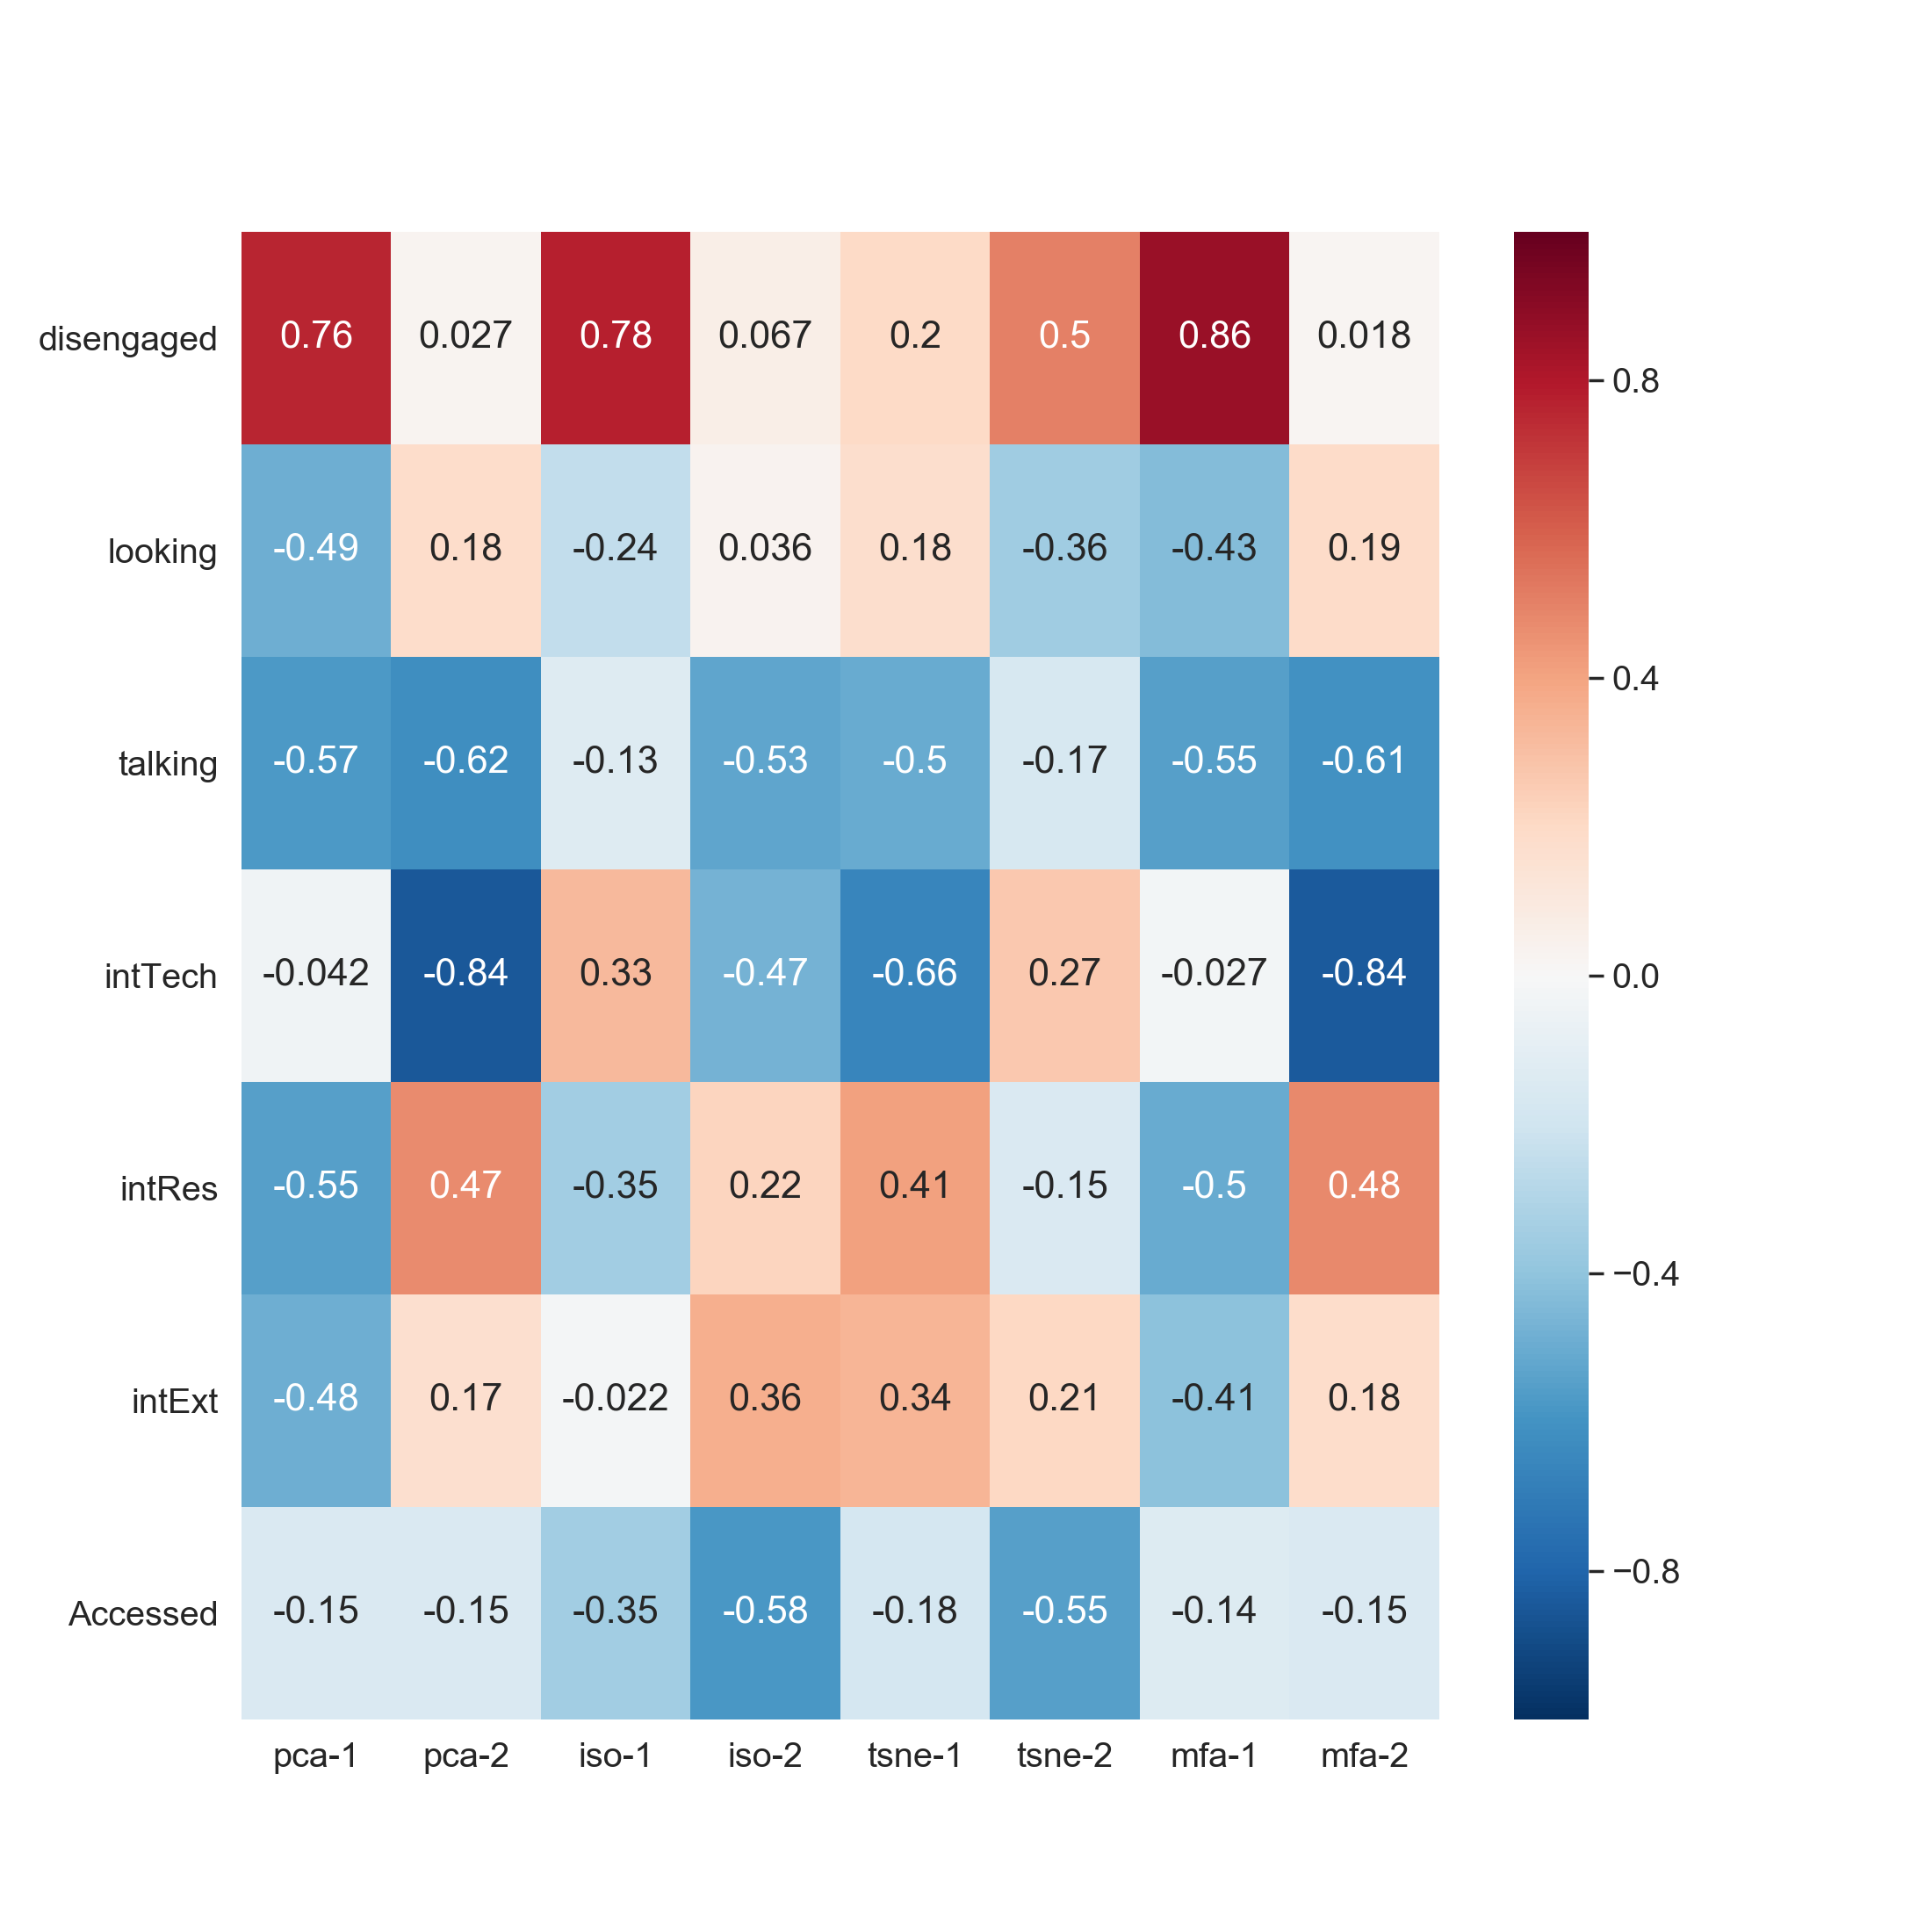

In [13]:
%matplotlib notebook

corr_matrix = data_6dec_copy.corr().iloc[0:7,-8:]
plt.figure(figsize=(11,11))
sns.set(font_scale=1.3)
sns.heatmap(corr_matrix,annot=True,cmap='RdBu_r',vmin=-1,vmax=1)
plt.yticks(rotation=0)
plt.savefig('Corr_6dec_final_1.png')